In [1]:
import pandas as pd

# Logistic regression

In [2]:
df=pd.read_csv("/Users/vins/Desktop/Datasets/Logistic_Regression/Social_Network_Ads.csv")

In [3]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
import numpy as np

In [7]:
#logistic regression 
g=1/(1+np.exp(0.00001))

In [8]:
g

0.49999750000000004

In [9]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=True,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc_x=StandardScaler()

In [14]:
X_train = sc_x.fit_transform(X_train)

C:\Users\vins\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
X_test=sc_x.transform(X_test)

C:\Users\vins\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# sc_y=StandardScaler()

In [17]:
# y_train=sc_y.fit_transform(pd.DataFrame(y_train))

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
classifier=LogisticRegression()

In [20]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred=classifier.predict(X_test)

In [22]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [23]:
pd.DataFrame(data=list(zip(y_test,y_pred)),columns=['y','y_hat']).head()

,y,y_hat
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,y_pred)

array([[78,  6],
       [11, 37]], dtype=int64)

In [26]:
!pip install mlxtend


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
from mlxtend.plotting import plot_decision_regions

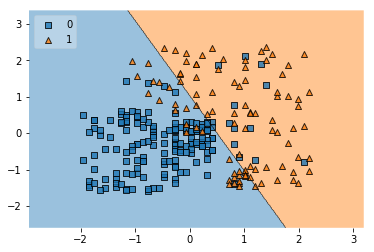

In [28]:
plot_decision_regions(X_train,y_train,clf=classifier,legend=2)

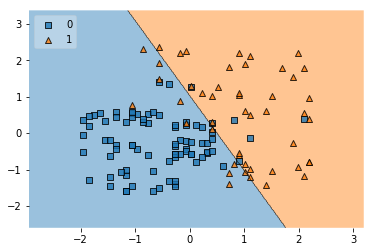

In [29]:
plot_decision_regions(X_test,y_test,clf=classifier,legend=2)

# K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier()

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_predi=knn.predict(X_test)

In [34]:
pd.DataFrame(data=list(zip(y_test,y_predi)),columns=['y','y_hat']).head()

,y,y_hat
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [35]:
confusion_matrix(y_test,y_predi)

array([[77,  7],
       [ 6, 42]], dtype=int64)

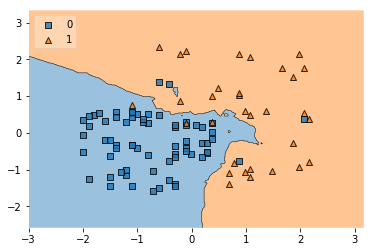

In [225]:
plot_decision_regions(X_test,y_test,clf=knn,legend=2)

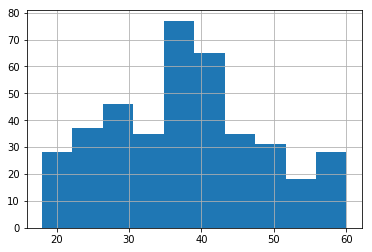

In [227]:
df["Age"].hist()

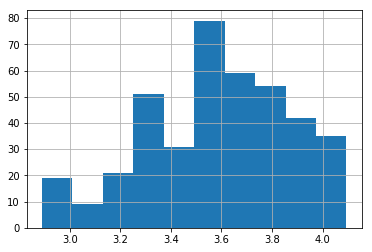

In [230]:
df["Age"].apply(np.log).hist()

# Support vector machine || Kernal SVM

In [237]:
from sklearn.svm import SVC

In [284]:
sup_vec_mac=SVC(kernel='rbf') #we can change the kernal like === rbf,poly,sigmoid,linear

In [285]:
sup_vec_mac.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [286]:
y_preic=sup_vec_mac.predict(X_test)

In [287]:
confusion_matrix(y_test,y_preic)

array([[64,  4],
       [ 3, 29]], dtype=int64)

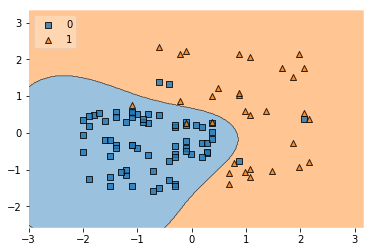

In [288]:
plot_decision_regions(X_test,y_test,clf=sup_vec_mac,legend=2)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dec_clf=DecisionTreeClassifier()

In [39]:
dec_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_predicttt=dec_clf.predict(X_test)

In [41]:
confusion_matrix(y_test,y_predicttt)

array([[77,  7],
       [11, 37]], dtype=int64)

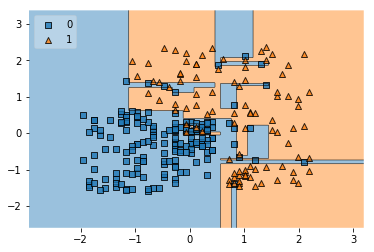

In [50]:
plot_decision_regions(X_train,y_train,clf=dec_clf,legend=2)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_clff = RandomForestClassifier(n_estimators=500,random_state=0)

In [57]:
rf_clff.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
y_predictttttt=rf_clff.predict(X_test)

In [59]:
confusion_matrix(y_test,y_predictttttt)

array([[78,  6],
       [ 7, 41]], dtype=int64)

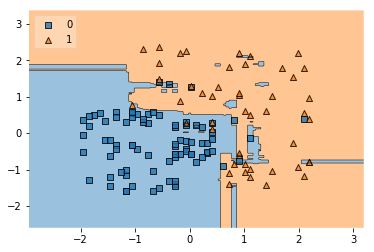

In [60]:
plot_decision_regions(X_test,y_test,clf=rf_clff,legend=2)